# Example 2: Dataframes

This Example demonstrates the capabilities of the class Dataframes_SIR3S_Model that extends SIR3S_Model be abilities to work directley with pandas dataframes.  

# Toolkit Release

In [1]:
#pip install 

# Imports

## SIR 3S Toolkit

### Regular Import/Init

In [2]:
SIR3S_SIRGRAF_DIR = r"C:\3S\SIR 3S Entwicklung\SirGraf-90-15-00-19_x64" #change to local path

In [3]:
from sir3stoolkit.core import wrapper

In [4]:
wrapper

<module 'sir3stoolkit.core.wrapper' from 'C:\\Users\\aUsername\\3S\\sir3stoolkit\\src\\sir3stoolkit\\core\\wrapper.py'>

In [5]:
wrapper.Initialize_Toolkit(SIR3S_SIRGRAF_DIR)

### Additional Import/Init for Dataframes class

from sir3stoolkit.mantle import dataframe

We can just import the whole mantle to get all higher level modeling functions.

In [6]:
from sir3stoolkit.mantle import mantle

In [7]:
s3s = mantle.Mantle_SIR3S_Model()

Initialization complete


In [8]:
from sir3stoolkit.mantle import mantle

In [9]:
s3s = mantle.Mantle_SIR3S_Model()

Initialization complete


## Additional

In [10]:
import pandas as pd
from shapely.geometry import Point
import re
import folium
from folium.plugins import HeatMap
import numpy as np
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
import contextily as cx

# Open Model

In [11]:
s3s.OpenModel(dbName=r"C:\Users\aUsername\3S\PT3S\PT3S\Examples\Example3.db3",
              providerType=s3s.ProviderTypes.SQLite,
              Mid="M-1-0-1",
              saveCurrentlyOpenModel=False,
              namedInstance="",
              userID="",
              password="")

Model is open for further operation


# Prepare Data

## District Heating Consumer

### Metadata

We can use the [generate_element_metadata_dataframe()](https://3sconsult.github.io/sir3stoolkit/references/sir3stoolkit.mantle.html#sir3stoolkit.mantle.dataframes.Dataframes_SIR3S_Model.generate_element_metadata_dataframe) method to obtain a dataframe for all instances of a specifc component type (Nodes, Pipes, etc.) with user defined metadata properties to be added.

In [12]:
df_consumer_metadata=s3s.generate_element_metadata_dataframe(element_type=s3s.ObjectTypes.DistrictHeatingConsumer, properties=[], geometry=True, filter_container_tks=s3s.GetMainContainer())

[2025-11-21 12:23:57,094] INFO in sir3stoolkit.mantle.dataframes: [metadata] Generating metadata dataframe for element type: ObjectTypes.DistrictHeatingConsumer
[2025-11-21 12:23:57,103] INFO in sir3stoolkit.mantle.dataframes: [metadata] Retrieved 337 element(s) of element type ObjectTypes.DistrictHeatingConsumer.
[2025-11-21 12:23:57,105] WARNING in sir3stoolkit.mantle.dataframes: [metadata] Removed invalid container tk: ObjectTypes.ObjectContainerSymbol. Proceeding without it.
[2025-11-21 12:23:57,105] ERROR in sir3stoolkit.mantle.dataframes: [metadata] Error occured while filtering with filter_container_tks: 'tuple' object has no attribute 'remove'
[2025-11-21 12:23:57,116] INFO in sir3stoolkit.mantle.dataframes: [Resolving Metadata Properties] Using 0 metadata properties.
[2025-11-21 12:23:57,116] INFO in sir3stoolkit.mantle.dataframes: [metadata] Retrieving geometry...
[2025-11-21 12:23:57,172] INFO in sir3stoolkit.mantle.dataframes: [metadata] Transforming DataFrame to GeoDataFra

In [13]:
df_consumer_metadata.head(3)

,tk,geometry
0,4743997951091160959,POINT (713181.847 5578489.925)
1,5014209100699808035,POINT (713369.327 5578395.123)
2,4627580049017248376,POINT (713251.536 5578455.252)


### Result Data

We can use the [generate_element_metadata_dataframe()](https://3sconsult.github.io/sir3stoolkit/references/sir3stoolkit.mantle.html#sir3stoolkit.mantle.dataframes.Dataframes_SIR3S_Model.generate_element_results_dataframe) method to obtain a dataframe for all instances of a specifc component type (Nodes, Pipes, etc.) with user defined result values for certain timestamps to be added.

In [14]:
s3s.GetResultProperties_from_elementType(s3s.ObjectTypes.DistrictHeatingConsumer, True)

['DH',
 'DP',
 'DPH',
 'IAKTIV',
 'INDUV',
 'LFH',
 'LFT',
 'M',
 'MHYUV',
 'MTHUV',
 'PHIRL',
 'PHIVL',
 'QM',
 'RHOI',
 'RHOK',
 'TI',
 'TK',
 'TVMIN',
 'W',
 'WSOLL']

In [15]:
df_consumer_results=s3s.generate_element_results_dataframe(s3s.ObjectTypes.DistrictHeatingConsumer, ["PHIRL", "DH", "W"], filter_container_tks=s3s.GetMainContainer())

[2025-11-21 12:23:57,232] INFO in sir3stoolkit.mantle.dataframes: [results] Generating results dataframe for element type: ObjectTypes.DistrictHeatingConsumer
[2025-11-21 12:23:57,233] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] No timestamps were given. Checking available simulation timestamps (SIR3S_Model.GetTimeStamps()).
[2025-11-21 12:23:57,316] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] 25 simulation timestamp(s) are available.
[2025-11-21 12:23:57,387] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] 25 valid timestamp(s) will be used.
[2025-11-21 12:23:57,399] INFO in sir3stoolkit.mantle.dataframes: [results] Retrieved 337 tks.
[2025-11-21 12:23:57,399] WARNING in sir3stoolkit.mantle.dataframes: [results] Removed invalid container tk: ObjectTypes.ObjectContainerSymbol. Proceeding without it.
[2025-11-21 12:23:57,403] ERROR in sir3stoolkit.mantle.dataframes: [results] Error occured while filtering with filter_container_tks: 't

## Pipes

### Metadata

In [16]:
s3s.GetPropertiesofElementType(s3s.ObjectTypes.Pipe)

['Name',
 'FkdtroRowd',
 'Fkltgr',
 'Fkstrasse',
 'L',
 'Lzu',
 'Rau',
 'Jlambs',
 'Lambda0',
 'Zein',
 'Zaus',
 'Zuml',
 'Asoll',
 'Indschall',
 'Baujahr',
 'Hal',
 'Fkcont',
 'Fk2lrohr',
 'Beschreibung',
 'Idreferenz',
 'Iplanung',
 'Kvr',
 'LineWidthMM',
 'DottedLine',
 'DN',
 'Di',
 'KvrKlartext',
 'HasClosedNSCHs',
 'Tk',
 'Pk',
 'IsMarked',
 'InVariant',
 'Xkor',
 'Ykor',
 'GeometriesDiffer',
 'bz.Fk',
 'bz.Qsvb',
 'bz.Irtrenn',
 'bz.Leckstatus',
 'bz.Leckstart',
 'bz.Leckend',
 'bz.Leckort',
 'bz.Leckmenge',
 'bz.Imptnz',
 'bz.Zvlimptnz',
 'bz.Kantenzv',
 'bz.ITrennWithNSCH']

In [17]:
df_pipes_metadata=s3s.generate_element_metadata_dataframe(element_type=s3s.ObjectTypes.Pipe, properties=["DN", "Kvr"], geometry=True, end_nodes=True, filter_container_tks=s3s.GetMainContainer())

[2025-11-21 12:24:00,098] INFO in sir3stoolkit.mantle.dataframes: [metadata] Generating metadata dataframe for element type: ObjectTypes.Pipe
[2025-11-21 12:24:00,102] INFO in sir3stoolkit.mantle.dataframes: [metadata] Retrieved 524 element(s) of element type ObjectTypes.Pipe.
[2025-11-21 12:24:00,104] WARNING in sir3stoolkit.mantle.dataframes: [metadata] Removed invalid container tk: ObjectTypes.ObjectContainerSymbol. Proceeding without it.
[2025-11-21 12:24:00,107] ERROR in sir3stoolkit.mantle.dataframes: [metadata] Error occured while filtering with filter_container_tks: 'tuple' object has no attribute 'remove'
[2025-11-21 12:24:00,110] INFO in sir3stoolkit.mantle.dataframes: [Resolving Metadata Properties] Using 2 metadata properties.
[2025-11-21 12:24:00,112] INFO in sir3stoolkit.mantle.dataframes: [metadata] Retrieving metadata properties ['DN', 'Kvr'], geometry, end nodes...
[2025-11-21 12:24:00,356] INFO in sir3stoolkit.mantle.dataframes: [metadata] 2 non-empty end node columns

In [18]:
df_pipes_metadata.head(3)

,tk,DN,Kvr,geometry,fkKI,fkKK
0,5442010239090746007,150,1,"LINESTRING (713620.268 5578828.419, 713602.295...",5669301360686511351,5397948523091900401
1,4917786378639043296,125,1,"LINESTRING (713602.295 5578860.106, 713574.062...",5397948523091900401,5239335112004772156
2,4762482310382009633,125,1,"LINESTRING (713574.062 5578909.873, 713553.84 ...",5239335112004772156,5298886695042021307


### Result data

In [19]:
df_pipes_results=s3s.generate_element_results_dataframe(s3s.ObjectTypes.Pipe, ["QMAV"], filter_container_tks=s3s.GetMainContainer())

[2025-11-21 12:24:00,437] INFO in sir3stoolkit.mantle.dataframes: [results] Generating results dataframe for element type: ObjectTypes.Pipe
[2025-11-21 12:24:00,439] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] No timestamps were given. Checking available simulation timestamps (SIR3S_Model.GetTimeStamps()).
[2025-11-21 12:24:00,550] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] 25 simulation timestamp(s) are available.
[2025-11-21 12:24:00,666] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] 25 valid timestamp(s) will be used.
[2025-11-21 12:24:00,672] INFO in sir3stoolkit.mantle.dataframes: [results] Retrieved 524 tks.
[2025-11-21 12:24:00,675] WARNING in sir3stoolkit.mantle.dataframes: [results] Removed invalid container tk: ObjectTypes.ObjectContainerSymbol. Proceeding without it.
[2025-11-21 12:24:00,675] ERROR in sir3stoolkit.mantle.dataframes: [results] Error occured while filtering with filter_container_tks: 'tuple' object has no

In [20]:
df_pipes_results.head(3)

tk,5442010239090746007,4917786378639043296,4762482310382009633,4987229536643024523,5722206630503885118,5089459212485379804,5526871502288882655,4809089329099085219,5170001087020228683,5625716875961234775,5501916898830363065,5192970129555982907,5027225217797463802,5107343838750080243,4840056338230495043,5700872284015490704,5290590848336792638,4781821593135991761,4770083637349644299,5140383994159421977,4615723899944629797,5485743457841402038,5061682782623660813,4868922965129592512,5253822763469470014,5468996363795343031,5339499657518903527,4811306899232458618,4928779983564758026,4965578769510488820,5600841315591171772,4995034655758156710,5209057104414292468,5726827761099671871,5080791944541542127,4996979568467922520,4893521402166887668,4943852467771545411,5294908835443772392,5407639481169980338,5494345815849234157,5559756735287401600,4688455252738739891,5120913591494019846,5189136483684313738,5027271755713739562,4843364651593046845,4763398616537422727,5211657964305638265,4899878437571936054,5017291090985710926,4968195666913259627,4872293615039533867,5073852406571450055,5460451359190976355,5680559127926603859,5701217076123185999,5343389149567015241,5004534437760811077,5638727652971481339,4933247170382646480,5144558095415012328,4676843093813396651,5238385499211955735,5431464167607748731,5021757307925561906,5735390708503613465,5602200558168325137,4976126317058169697,5611058499224570176,4951309552891536851,4734625425618016004,5003475594426980558,5199984776776235548,5146987453990281112,4664282009021425543,4730098385004060223,5143417057295500465,4870893641534242754,4751771958060245818,5431352512414392985,4756919352045195395,4950699445422043390,5443612009555325057,5130272059781459965,5030450908543536722,5425728209090108132,4897883139609927597,5385910423114382788,4815053638180850703,5520594566396266859,4822932207368532352,4943632133505495565,5136719248606301905,5222700144096421193,5209596079625295991,5215757535605464866,5089350764087843246,4922208128354560629,5176883269076091732,4882993749777364317,5374456943006507008,4843836890906700052,5535463940319820632,5012186927559751405,4986912592668362327,5119633900217288954,5293317689029296733,4766100927082653384,5638908776577558151,5244494914545547298,4818046255571175936,4826614335972511296,5223081641641736592,5248841557788033271,5612538195203776712,5446352019210100674,5198739705259994278,5120004980087359327,5081007708328729580,5332936729509410779,5193926613850153217,5669055683311185692,5142801769428353146,5570925755149935463,5089627882145801048,5749509498631743083,5313314888424094938,5672198676406030965,5492269585462839687,4878085949235357089,5009009696813138306,5417154223408487165,4888087184557203150,5482200169109927461,5506250915346749683,5249576152024204638,5377200445080630699,5293057810555927426,4869711570166799356,5116990929886803340,5735615340560878820,4881353465437199724,5621715799375882738,5012002718030878203,5398733809575429001,5028247962181469636,4900101542637177072,5277687384123072302,5494173646602854486,5052735000191334434,5539639795342428023,5278182790120832611,5199049455293895634,4921179458989199657,4916972176026821426,5022571509924021844,4763784987464972068,5277721701940071811,5134029809569092929,5078017899111203433,5254059088049802980,5371971925339056665,5431036277668526595,5483354135827032665,5285379841869150294,5293405653296791451,4819969964299896962,5351904744714142235,5646757598295302988,5691533564979419761,5048873293262650113,5643610361723733925,5199821632200720341,5532148500642435090,5595641383032896800,5473664242867087532,5537095863454943245,4971302338639629382,5013314486814762862,5242300102291724928,5546837522852121331,5019054790932573745,4728990773140988900,5367689158219221191,5218286473243188911,5539804019387586531,5617925833435212075,5306936070034225058,5358411267245496507,4713734746689397424,5149494653460530987,5084014870632527368,5657819787231956123,4869220947327072403,4715322105206840823,5187233458674428963,5629674368074184841,5435501069470547583,53306533540082781

# WORK IN PROGRESS: Plotting

## Dfs

## Consumers

In [21]:
df_consumer_results.columns = df_consumer_results.columns.droplevel([1, 2])
df_consumer_results = df_consumer_results.T.unstack(level=0).T
df_consumer_results = df_consumer_results.droplevel(0, axis=0)
df_consumer = df_consumer_metadata.merge(on="tk",
                    how="outer",
                    right=df_consumer_results)

In [22]:
df_consumer.head(3)

,tk,geometry,DH,PHIRL,W
0,4611752310942477664,POINT (713675.3 5578705.193),17.17846,-3.333333E+32,39.36727
1,4611752310942477664,POINT (713675.3 5578705.193),17.17842,-3.333333E+32,39.3675
2,4611752310942477664,POINT (713675.3 5578705.193),17.20626,-3.333333E+32,39.84178


In [23]:
df_consumer=df_consumer[df_consumer["geometry"].x < 713800]

## Pipes

In [24]:
df_pipes_results.columns = df_pipes_results.columns.droplevel([1, 2])
df_pipes_results = df_pipes_results.T.unstack(level=0).T
df_pipes_results = df_pipes_results.droplevel(0, axis=0)
df_pipes = df_pipes_metadata.merge(on="tk",
                    how="outer",
                    right=df_pipes_results)

In [25]:
df_pipes["QMAV"]=df_pipes["QMAV"].astype(float)

In [26]:
df_pipes["QMAV"]=df_pipes["QMAV"].abs()

In [27]:
df_pipes=df_pipes.rename(columns={"QMAV": "QMAVAbs"})

In [28]:
df_pipes['DN'] = pd.to_numeric(df_pipes['DN'], errors='coerce')
df_pipes['QMAVAbs'] = pd.to_numeric(df_pipes['QMAVAbs'], errors='coerce')

In [29]:
df_pipes = df_pipes[df_pipes["Kvr"] == "1"]

In [30]:
df_pipes = df_pipes[df_pipes['DN'] != 999]

### Plotting Constants

def parse_point_string(s):
    # Extract numbers from the string using regex
    match = re.match(r'POINT\s*\(\s*([-\d\.]+)\s+([-\d\.]+)\s*\)', s)
    if match:
        x, y = float(match.group(1)), float(match.group(2))
        return Point(x, y)
    else:
        return None

In [31]:
df_consumer.head(3)

,tk,geometry,DH,PHIRL,W
0,4611752310942477664,POINT (713675.3 5578705.193),17.17846,-3.333333E+32,39.36727
1,4611752310942477664,POINT (713675.3 5578705.193),17.17842,-3.333333E+32,39.3675
2,4611752310942477664,POINT (713675.3 5578705.193),17.20626,-3.333333E+32,39.84178


df_consumer['geometry'] = df_consumer['geometry'].apply(parse_point_string)

x_mean = df_consumer['geometry'].apply(lambda p: p.x if p else None).mean()
y_mean = df_consumer['geometry'].apply(lambda p: p.y if p else None).mean()

# Plotting (WORK IN PROGRESS)

The function used below is not yet released.

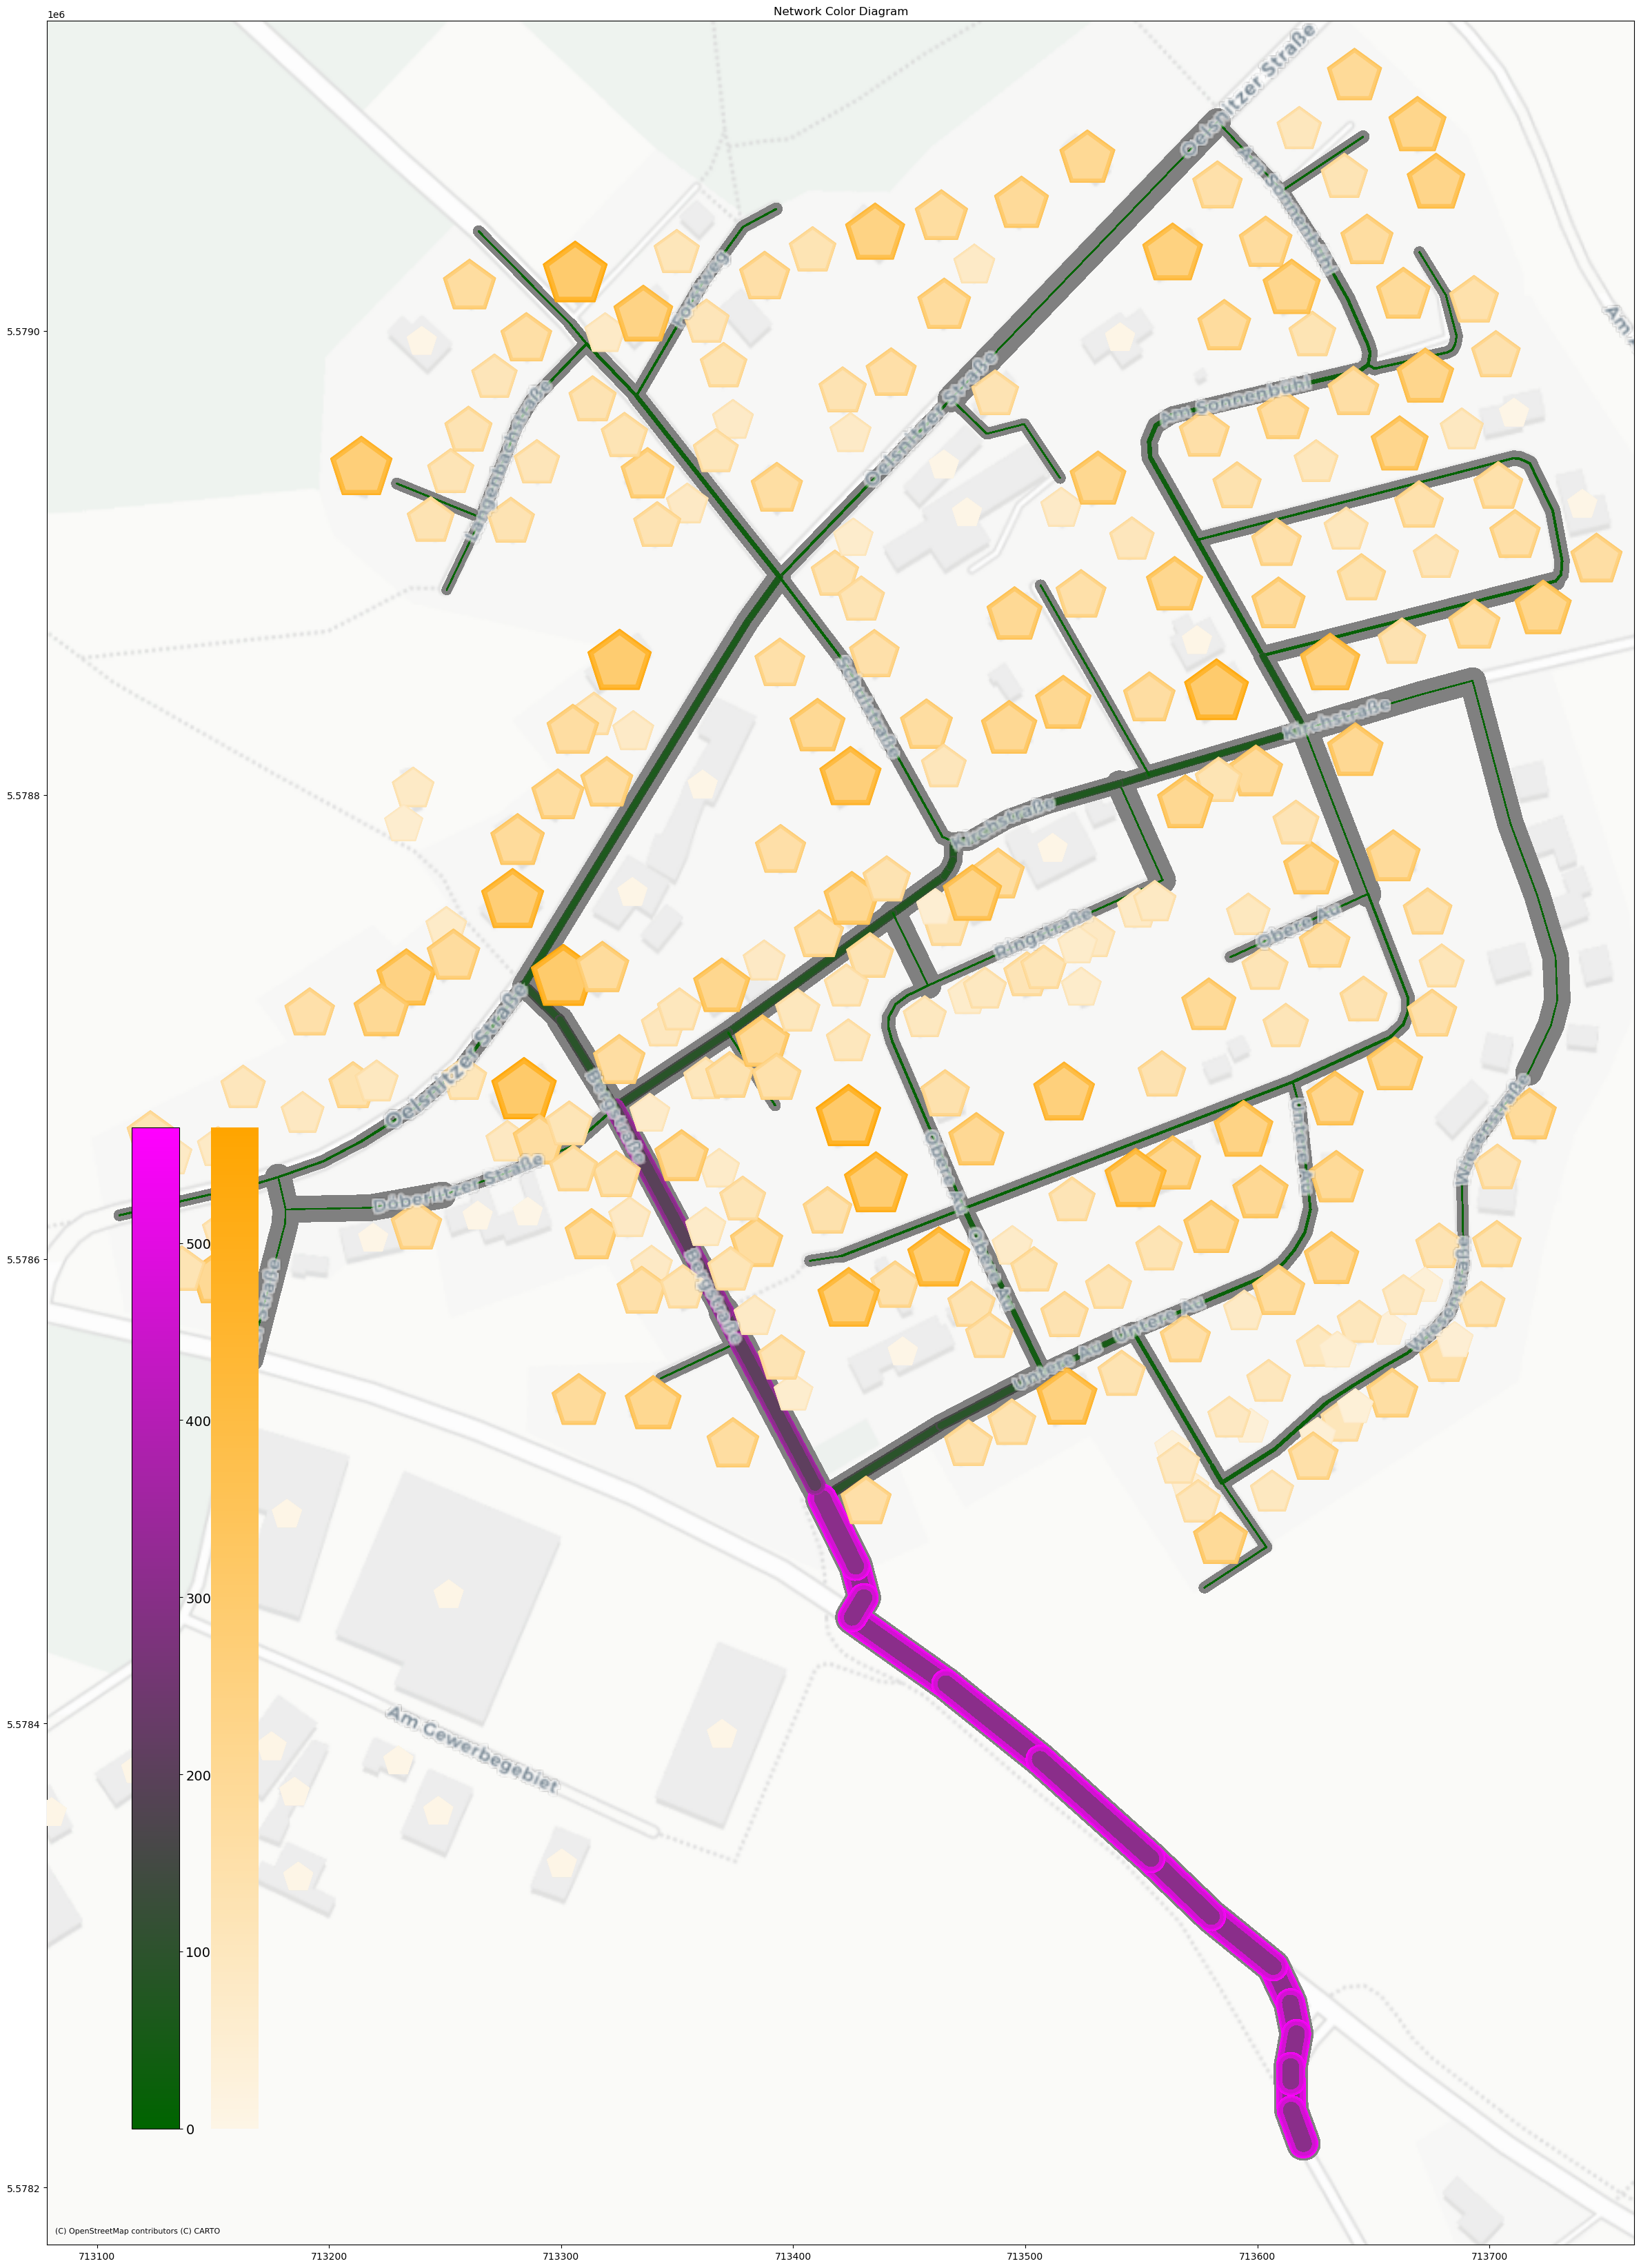

In [32]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import contextily as cx

fig, ax = plt.subplots(figsize=(29.7, 42))

layer1 = s3s.create_pipe_layer(
    gdf=df_pipes,
    geometry_col="geometry",
    width_scaling_col="DN",
    #color_mixing_col="QMAVAbs",
    min_width = 10,
    max_width = 35,
    default_color = (0.5, 0.5, 0.5, 1)
)

ax = layer1["axes"] 

layer2 = s3s.create_pipe_layer(
    gdf=df_pipes,
    ax=ax,
    geometry_col="geometry",
    cmap=LinearSegmentedColormap.from_list("W", ['darkgreen', 'magenta']),
    width_scaling_col="QMAVAbs",
    color_mixing_col="QMAVAbs",
    min_width = 1,
    max_width = 30,
)

layer3 = s3s.create_node_layer(
    gdf=df_consumer,
    ax=ax,
    geometry_col="geometry",
    cmap=LinearSegmentedColormap.from_list("W", ["oldlace", "orange"]),
    size_scaling_col="W",
    color_mixing_col="W",
    min_size=1000,
    max_size=5000,

)

xmin, ymin, xmax, ymax = layer1["bbox"]

xpad = (xmax - xmin) * 0.05
ypad = (ymax - ymin) * 0.05

ax.set_xlim(xmin - xpad, xmax + xpad)
ax.set_ylim(ymin - ypad, ymax + ypad)

cx.add_basemap(
    ax,
    crs=df_pipes.crs.to_string(),
    source=cx.providers.CartoDB.PositronNoLabels,
    zorder=1 
)

cx.add_basemap(
    ax,
    crs=df_pipes.crs.to_string(),
    source=cx.providers.CartoDB.PositronOnlyLabels,
    zorder=20 
)

layer1["artist"].set_zorder(5)  
layer2["artist"].set_zorder(10)  
layer3["artist"].set_zorder(15)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Colorbar for layer2 (pipes)
axins1 = inset_axes(ax, width="2%", height="30%", loc="lower left",
                    bbox_to_anchor=(0.05, 0.05, 1.5, 1.5), bbox_transform=ax.transAxes)
cbar1 = plt.colorbar(layer2["artist"], cax=axins1, cmap=layer2["cmap"], norm=layer2["norm"])
cbar1.set_label("QMAVAbs [m³/h]", fontsize=16, fontweight="bold")
cbar1.ax.tick_params(labelsize=14)

# Colorbar for layer3 (nodes)
axins2 = inset_axes(ax, width="2%", height="30%", loc="lower left",
                    bbox_to_anchor=(0.1, 0.05, 1.5, 1.5), bbox_transform=ax.transAxes)
cbar2 = plt.colorbar(layer3["artist"], cax=axins2, cmap=layer3["cmap"], norm=layer3["norm"])
cbar2.set_label("Consumer Load (W)", fontsize=16, fontweight="bold")
cbar2.ax.tick_params(labelsize=14)
plt.axis("off")

ax.set_title("Network Color Diagram")
plt.show()